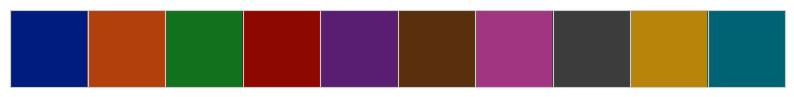

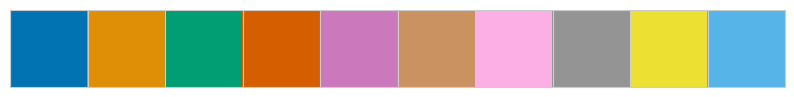

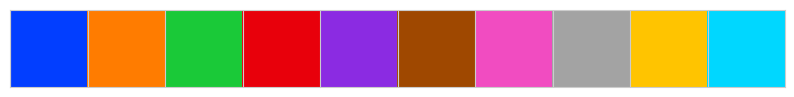

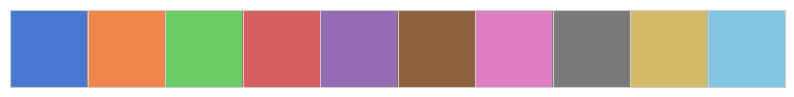

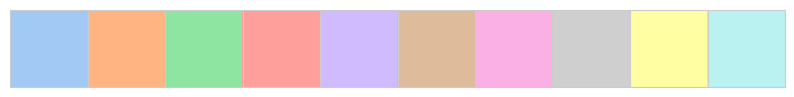

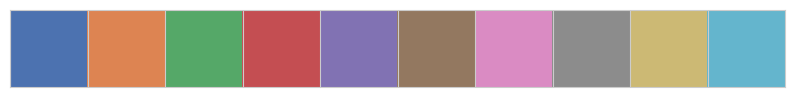

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("tab10")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# colors = ["#632E62", "#92278F", "#9B57D3", "#755DD9", "#665EB8", "#45A5ED", "#5982DB"]
# Set the text color to light gray
#sns.set_context("talk", font_scale=1)
# sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("colorblind"))
#plt.rcParams['text.color'] = '#DEDFE0'

# # Test the palette by plotting a simple example

sns.palplot(sns.color_palette("dark"))
sns.palplot(sns.color_palette("colorblind"))
sns.palplot(sns.color_palette("bright"))
sns.palplot(sns.color_palette("muted"))
sns.palplot(sns.color_palette("pastel"))
sns.palplot(sns.color_palette("deep"))


## Dataset Exploration

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.shape

(891, 12)

In [3]:
# Survived: Outcome of survival (0 = No; 1 = Yes)
# Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
# Name: Name of passenger
# Sex: Sex of the passenger
# Age: Age of the passenger (Some entries contain NaN)
# SibSp: Number of siblings and spouses of the passenger aboard
# Parch: Number of parents and children of the passenger aboard
# Ticket: Ticket number of the passenger
# Fare: Fare paid by the passenger
# Cabin: Cabin number of the passenger (Some entries contain NaN)
# Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


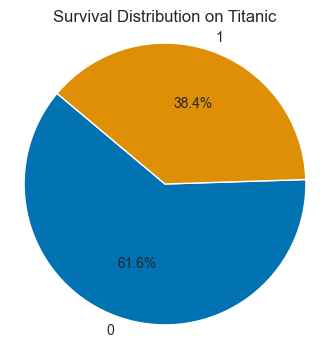

In [5]:
survived_count = df['Survived'].value_counts()

plt.figure(figsize=(4, 4));
plt.pie(survived_count, labels=survived_count.index, autopct='%1.1f%%', startangle=140);
plt.title('Survival Distribution on Titanic');
plt.axis('equal');

plt.savefig('data_viz/pie.png', transparent=True)

Text(0, 0.5, 'Count')

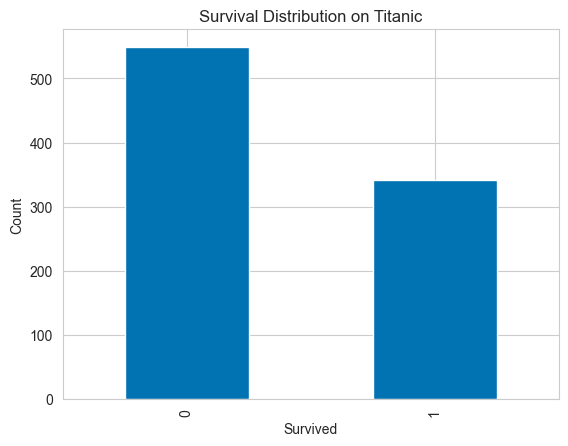

In [6]:
survived_count.plot(kind='bar')
plt.title('Survival Distribution on Titanic');
plt.xlabel('Survived')
plt.ylabel('Count')

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

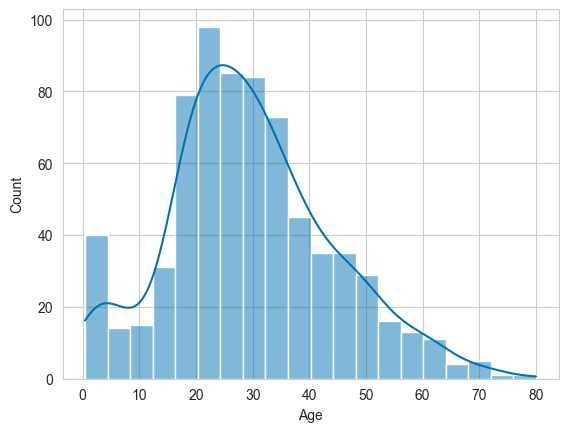

In [8]:
sns.histplot(df['Age'], kde=True)

[(0.0, 103.0)]

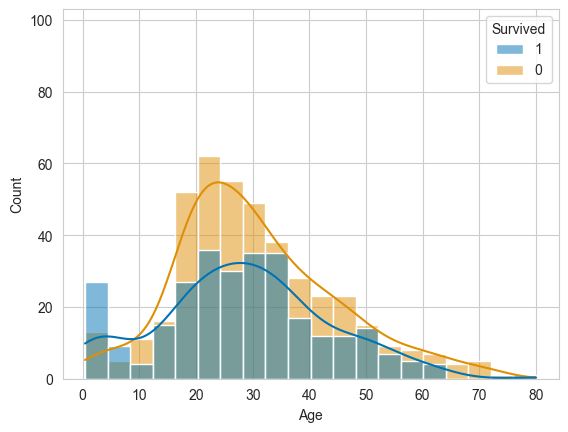

In [9]:
g = sns.histplot(df, x='Age', hue='Survived', kde=True, hue_order=[1,0])
g.set(ylim=(0, 103))

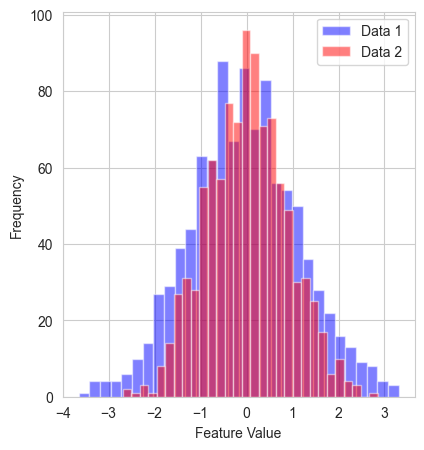

In [10]:
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1.2, size=1000)  # First distribution centered at 0
data2 = np.random.normal(loc=0, scale=0.9, size=1000)  # Second distribution centered at 2

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data1, bins=30, color='blue', alpha=0.5, label='Data 1')
plt.hist(data2, bins=30, color='red', alpha=0.5, label='Data 2')
# plt.title('Histograms of Separable Data')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()

<AxesSubplot: xlabel='Fare', ylabel='Count'>

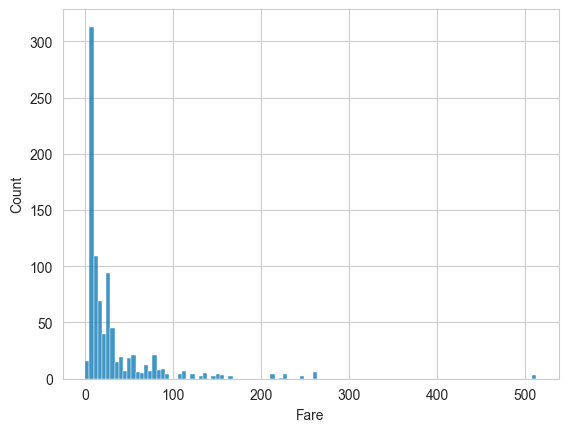

In [11]:
sns.histplot(df, x='Fare', kde=False, hue_order=[1,0])

<AxesSubplot: xlabel='Fare', ylabel='Count'>

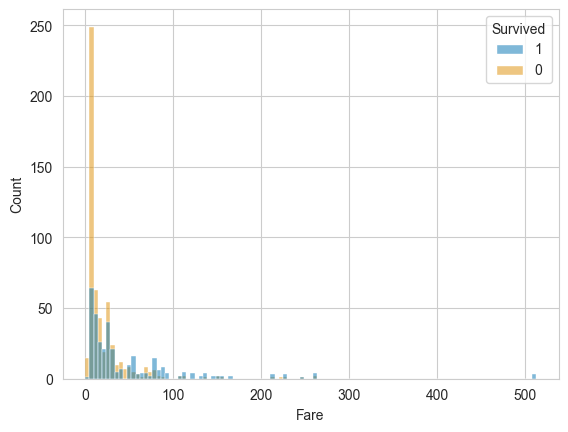

In [12]:
sns.histplot(df, x='Fare', hue='Survived', kde=False, hue_order=[1,0])

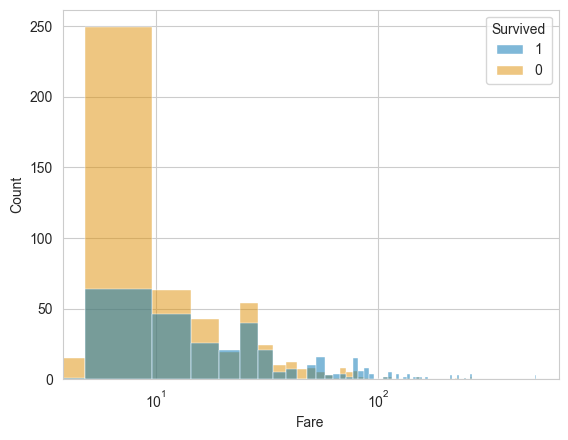

In [13]:
sns.histplot(df, x='Fare', hue='Survived', kde=False, hue_order=[1,0])
plt.xscale('log')

(0.0, 300.0)

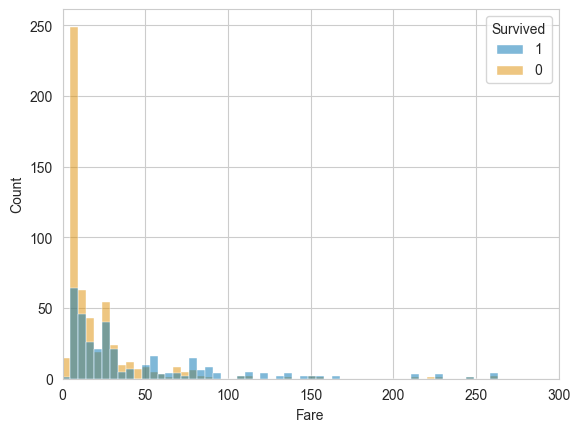

In [14]:
sns.histplot(df, x='Fare', hue='Survived', kde=False, hue_order=[1,0])
plt.xlim(0, 300)

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

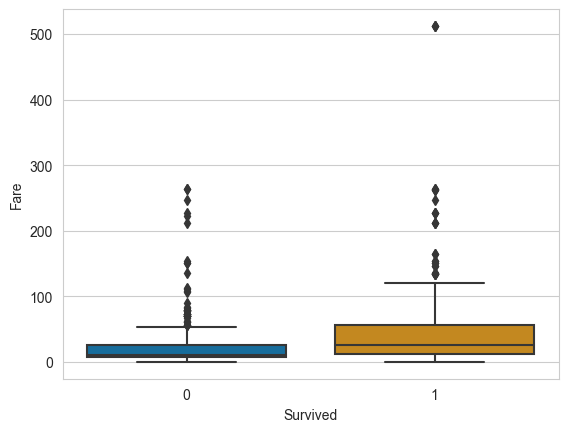

In [15]:
sns.boxplot(x="Survived", y="Fare", data=df)

<AxesSubplot: xlabel='Survived', ylabel='Age'>

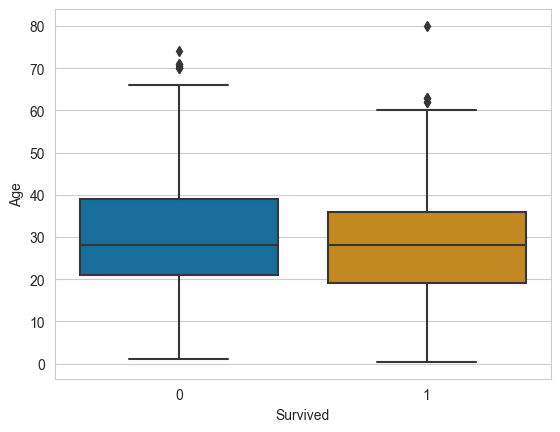

In [16]:
sns.boxplot(x="Survived", y="Age", data=df)

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

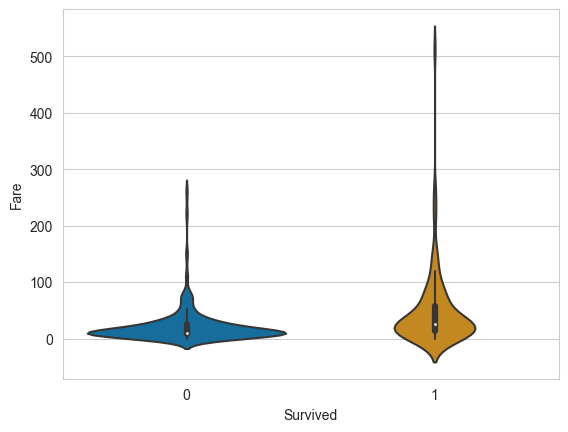

In [17]:
sns.violinplot(x="Survived", y="Fare", data=df)

<AxesSubplot: xlabel='Survived', ylabel='Age'>

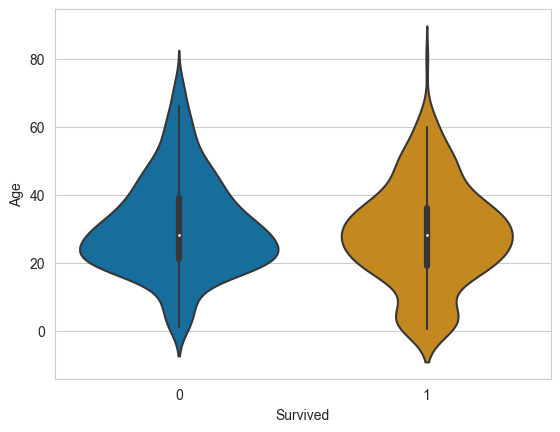

In [18]:
sns.violinplot(x="Survived", y="Age", data=df)

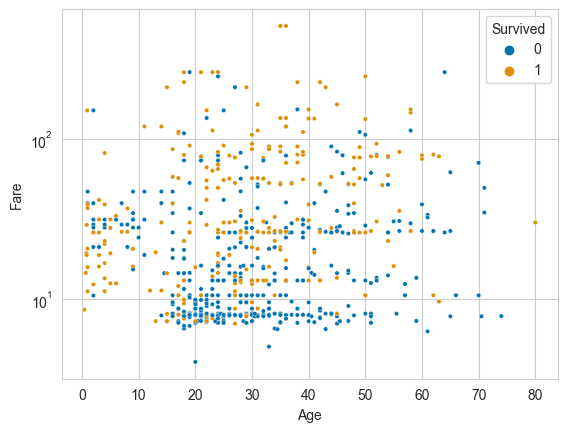

In [19]:
g = sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, s=10)
plt.yscale('log')


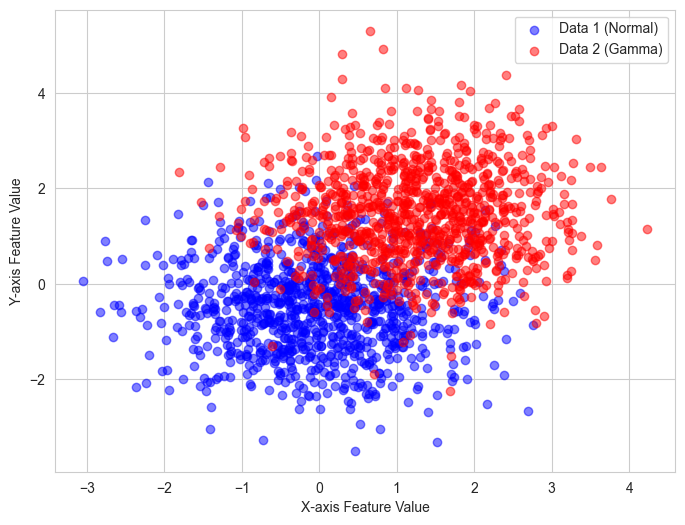

In [20]:
# Generate data from normal and gamma distributions
np.random.seed(0)
x_data1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution for x-axis of Data 1
y_data1 = np.random.normal(loc=-0.5, scale=1, size=1000)  # Normal distribution for y-axis of Data 1

x_data2 = np.random.normal(loc=1.3, scale=1, size=1000)  # Gamma distribution for x-axis of Data 2
y_data2 = np.random.normal(loc=1.5, scale=1, size=1000)  # Gamma distribution for y-axis of Data 2

# Plot scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(x_data1, y_data1, color='blue', alpha=0.5, label='Data 1 (Normal)')
plt.scatter(x_data2, y_data2, color='red', alpha=0.5, label='Data 2 (Gamma)')

# plt.title('Scatter Plot of Separable Data')
plt.xlabel('X-axis Feature Value')
plt.ylabel('Y-axis Feature Value')
plt.legend()

plt.grid(True)
plt.show()


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

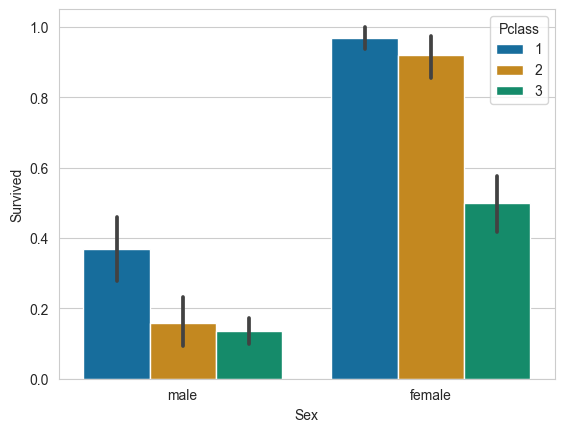

In [21]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)

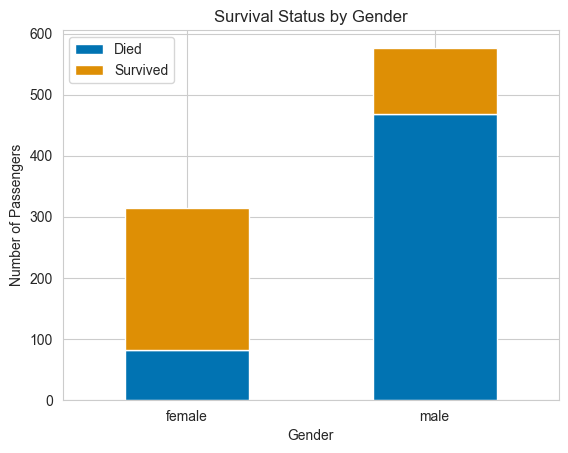

In [22]:
# Group the data by sex and survival status and count the number of passengers in each group
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the bar plot
survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.legend(['Died', 'Survived'])
plt.show()


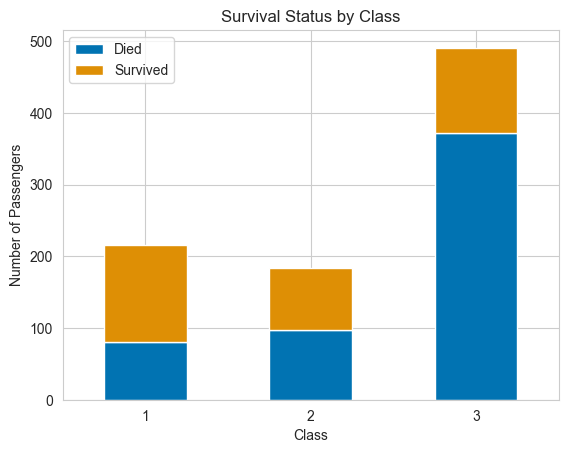

In [23]:
# Group the data by sex and survival status and count the number of passengers in each group
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting the bar plot
survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival Status by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.legend(['Died', 'Survived'])
plt.show()



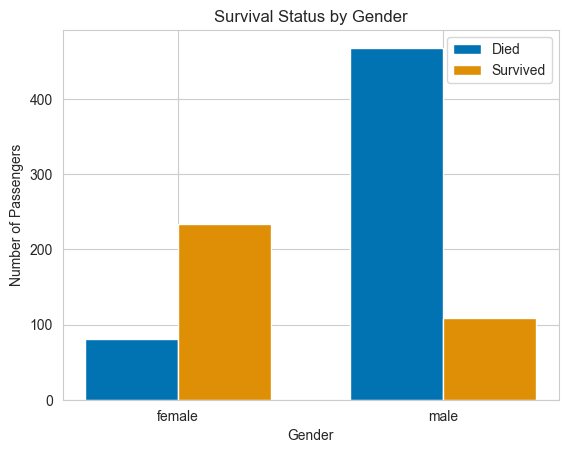

In [24]:
# Group the data by sex and survival status and count the number of passengers in each group
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Get the categories and their positions
categories = survival_counts.index
x = range(len(categories))

# Plotting the bar plot
bar_width = 0.35
plt.bar(x, survival_counts[0], width=bar_width, label='Died')
plt.bar([i + bar_width for i in x], survival_counts[1], width=bar_width, label='Survived')

plt.title('Survival Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks([i + bar_width / 2 for i in x], categories)
plt.legend()
plt.show()

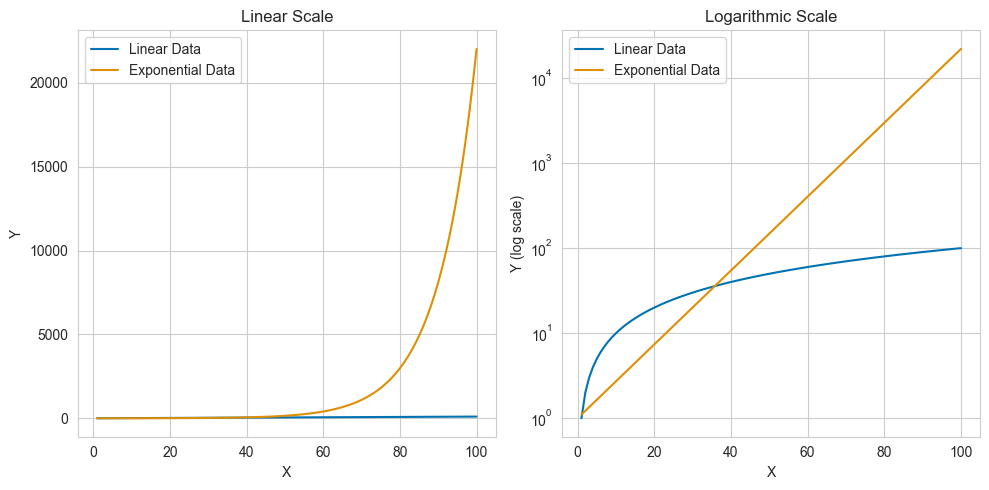

In [25]:
x = np.arange(1, 101)
y_linear = x
y_exponential = np.exp(x / 10.0)

# Create a plot with linear scale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_linear, label='Linear Data')
plt.plot(x, y_exponential, label='Exponential Data')
plt.title('Linear Scale')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Create a plot with logarithmic scale
plt.subplot(1, 2, 2)
plt.plot(x, y_linear, label='Linear Data')
plt.plot(x, y_exponential, label='Exponential Data')
plt.yscale('log')  # Setting y-axis to logarithmic scale
plt.title('Logarithmic Scale')
plt.xlabel('X')
plt.ylabel('Y (log scale)')
plt.legend()

plt.tight_layout()
plt.show()

# Classification

In [26]:
df2 = df[['Pclass','Sex','Age','Fare']]
df2 = df2.fillna(method="ffill")
df3 = pd.get_dummies(df2.Sex)
df2 = pd.concat([df2, df3],axis='columns')
df2.drop('Sex', axis='columns', inplace=True)
df2.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [27]:
target = df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(df2,target,test_size=0.2)
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree.score(x_test, y_test )

0.7988826815642458

In [28]:


x_train, x_test, y_train, y_test = train_test_split(df2, df['Survived'], test_size=0.2)

# Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_accuracy = rf.score(x_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8324022346368715


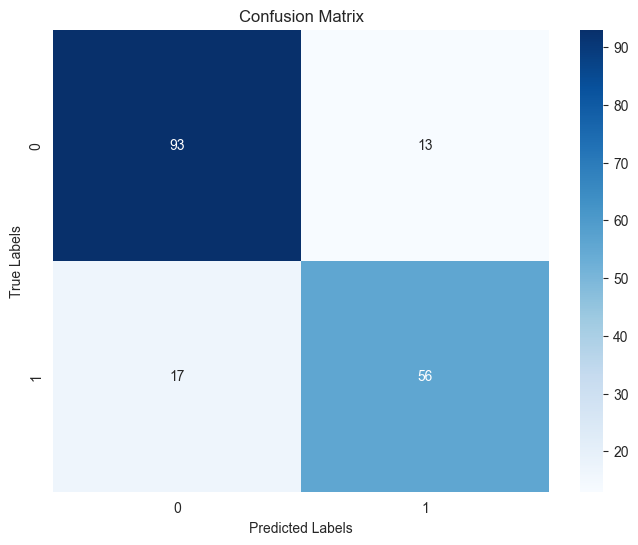

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       106
           1       0.81      0.77      0.79        73

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

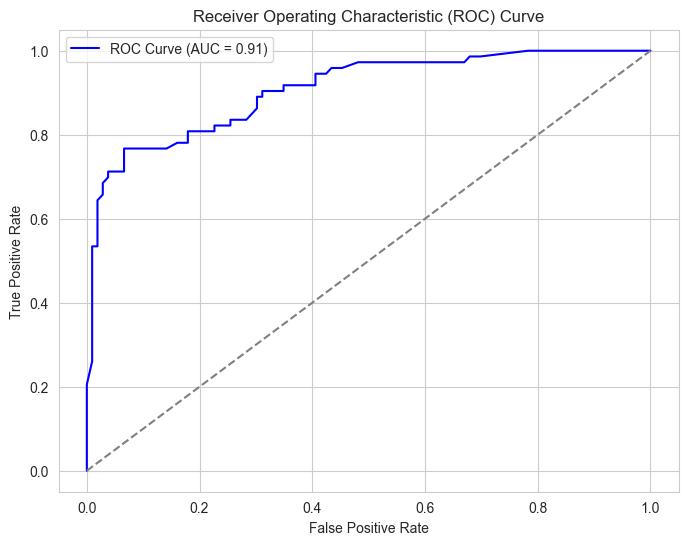

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities
y_pred_proba = rf.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()